<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/Project3_Marta_EDA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMDB dataset - general info
# title.akas.tsv.gz - Contains the following information for titles:
# titleId (string) - a tconst, an alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# title (string) – the localized title
# region (string) - the region for this version of the title
# language (string) - the language of the title
# types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
# attributes (array) - Additional terms to describe this alternative title, not enumerated
# isOriginalTitle (boolean) – 0: not original title; 1: original title

# Marta
# title.basics.tsv.gz - Contains the following information for titles:
# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

# Marta
# title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
# tconst (string) - alphanumeric unique identifier of the title
# directors (array of nconsts) - director(s) of the given title
# writers (array of nconsts) – writer(s) of the given title

# title.episode.tsv.gz – Contains the tv episode information. Fields include:
# tconst (string) - alphanumeric identifier of episode
# parentTconst (string) - alphanumeric identifier of the parent TV Series
# seasonNumber (integer) – season number the episode belongs to
# episodeNumber (integer) – episode number of the tconst in the TV series

# title.principals.tsv.gz – Contains the principal cast/crew for titles
# tconst (string) - alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# nconst (string) - alphanumeric unique identifier of the name/person
# category (string) - the category of job that person was in
# job (string) - the specific job title if applicable, else '\N'
# characters (string) - the name of the character played if applicable, else '\N'

#self-category: 
# Appear in titles with the genre Documentary
# Appear in titles with the keyword TV-special (e.g. the Academy Awards ceremony broadcast)
# Appear in titles with the keyword non-fiction (e.g. Talk-Shows)
# Are credited as "himself, herself, self, themselves" (e.g. in Making-of featurettes or Reality TV)
# are displayed in a separate section called "Self" and other roles will appear in their respective groupings.

# title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
# tconst (string) - alphanumeric unique identifier of the title
# averageRating – weighted average of all the individual user ratings
# numVotes - number of votes the title has received

# name.basics.tsv.gz – Contains the following information for names:
# nconst (string) - alphanumeric unique identifier of the name/person
# primaryName (string)– name by which the person is most often credited
# birthYear – in YYYY format
# deathYear – in YYYY format if applicable, else '\N'
# primaryProfession (array of strings)– the top-3 professions of the person
# knownForTitles (array of tconsts) – titles the person is known for

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import regex as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

my_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
#IMDB_title.basics
title_basics = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_basics_p.pkl')
title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9324309,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9324310,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9324311,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9324312,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [ ]:
#IMDB_title.akas
title_akas = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_akas_p.pickle')
title_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
33626383,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
33626384,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
33626385,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
33626386,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [ ]:
#IMDB_title.crew
title_crew = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_crew_p.pickle')
title_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
9324309,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9324310,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9324311,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
9324312,tt9916856,nm10538645,nm6951431


In [ ]:
#IMDB_title.ratings
title_ratings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_ratings_p.pickle')
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1241069,tt9916690,7.4,6
1241070,tt9916720,5.3,270
1241071,tt9916730,9.0,6
1241072,tt9916766,6.7,21


In [ ]:
#Checks about tconts from title_basics in name_basics are ok
# condition = name_basics['tconst'] == 'tt0000001'
# condition.unique()

## Know the data

# M1) title_basics

In [ ]:
#Check the types of variables and null values
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324314 entries, 0 to 9324313
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 640.2+ MB


In [ ]:
# object ok = tconst, titleTyoe, primaryTitle, originalTitle

# isAdult: is bool, check if there are only 0 and 1

# runtimeMinutes : should be int

In [ ]:
#TODO=: convert runtimeminutes to int??
type(title_basics['runtimeMinutes'][0]) #-> str

str

In [ ]:
#check which variables the isAdult column has
title_basics['isAdult'].unique()

array([0, 1, 2019, 1981, 2020, 2017, '0', '1', '\\N', 2014, 2005],
      dtype=object)

In [ ]:
#check which variables the isAdult column has and count them
title_basics['isAdult'].value_counts()

0       8971333
1        287436
0         63384
1          2151
2019          3
2020          2
1981          1
2017          1
\N            1
2014          1
2005          1
Name: isAdult, dtype: int64

In [ ]:
#countercheck
condition = title_basics['isAdult'] == 2019
condition.unique()

array([False,  True])

In [ ]:
# go to imbd site and check what happens in theses tv episodes: 
condition = title_basics['isAdult'] == 2019
title_basics.loc[condition]

# Answer:
# it's the year when they aired the episode for 2020, 2019, 1981, 2017, 2014, 2005

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1097683,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
1508854,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,Talk-Show,NaN
9280915,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,Talk-Show,NaN


In [ ]:
#check if other tv episodes show the date as start year or if they are //N 
condition = title_basics['titleType'] == 'tvEpisode'
title_basics.loc[condition]

title_basics['startYear'].loc[condition].value_counts()
#title_basics['endYear'].loc[condition].value_counts()

#The startyear column has 1105935 /N for the titletype = tv episodes
#The endyear column is empty for all the titletype = tv episodes


\N      1110064
2021     348354
2018     320945
2017     317463
2019     316428
         ...   
1925          3
2029          2
2027          2
1906          1
1900          1
Name: startYear, Length: 107, dtype: int64

In [ ]:
#TODO replace the years checked in the startYear column

In [ ]:
condition = title_basics['isAdult'] == 0 | 1
title_basics.loc[condition]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
59140,tt0060313,movie,"Dingle, Dangle","Dingle, Dangle",1,1966,\N,61,Comedy
60704,tt0061926,movie,Lust Weekend,Lust Weekend,1,1967,\N,70,Drama
61120,tt0062361,movie,Thigh Spy,Thigh Spy,1,1967,\N,70,Drama
61175,tt0062417,movie,Un épais manteau de sang,Un épais manteau de sang,1,1968,\N,88,Drama
61479,tt0062727,short,Of Special Merit,Besonders wertvoll,1,1968,\N,11,"Adult,Short"
...,...,...,...,...,...,...,...,...,...
9323788,tt9915710,video,Sodomizer 5,Sodomizer 5,1,1996,\N,85,Adult
9323813,tt9915772,tvEpisode,Cassidy Banks loves the Hitachi Wand,Cassidy Banks loves the Hitachi Wand,1,\N,\N,\N,"Adult,Short"
9323817,tt9915788,tvEpisode,Teen travel mates hot fucking,Teen travel mates hot fucking,1,\N,\N,\N,Adult
9324026,tt9916254,video,Big Tit Cream Pie 32,Big Tit Cream Pie 32,1,2015,\N,226,Adult


In [ ]:
condition = title_basics['isAdult'] == '0'
title_basics.loc[condition]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2949120,tt13608912,tvEpisode,Episode #4.72,Episode #4.72,0,\N,\N,\N,Talk-Show
2949121,tt13608914,tvEpisode,Episode #4.74,Episode #4.74,0,\N,\N,\N,Talk-Show
2949122,tt13608916,tvEpisode,Episode #4.76,Episode #4.76,0,\N,\N,\N,Talk-Show
2949123,tt13608918,tvEpisode,Episode #4.75,Episode #4.75,0,\N,\N,\N,Talk-Show
2949124,tt1360891,tvMovie,Vanished: The Cold Case of Kathie Durst,Vanished: The Cold Case of Kathie Durst,0,2001,\N,\N,"Crime,Documentary"
...,...,...,...,...,...,...,...,...,...
3014651,tt1373104,short,The Jealous Dog,Il cane geloso,0,1907,\N,\N,Short
3014652,tt13731054,tvEpisode,Ebb Tide,Ebb Tide,0,2013,\N,\N,Comedy
3014653,tt1373105,short,Il caro viveri,Il caro viveri,0,1912,\N,\N,Short
3014654,tt1373106,short,Il cavalier Fantasma,Il cavalier Fantasma,0,1911,\N,\N,Short


In [ ]:
#check value_counts other columns
#total entries: 9301902

title_basics['tconst'].nunique()
#9301902

#Are there any /N values?
condition = title_basics['tconst'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: 0

0

In [ ]:
title_basics['titleType'].nunique()

#11 unique values
# how many rows I can use from the dataset (are they usable)? are the other values /N?

11

In [ ]:
title_basics['titleType'].value_counts()

tvEpisode       7036854
short            896614
movie            625336
video            266487
tvSeries         233145
tvMovie          138011
tvMiniSeries      45697
tvSpecial         38834
videoGame         32631
tvShort           10703
tvPilot               2
Name: titleType, dtype: int64

In [ ]:
title_basics[title_basics['titleType'] == 'movie'].nunique()

tconst            625336
titleType              1
primaryTitle      540686
originalTitle     552200
isAdult                4
startYear            136
endYear                1
runtimeMinutes       499
genres              1470
dtype: int64

In [ ]:
title_basics['primaryTitle'].nunique()
#4262092 unique values
#some are repeated

#Are there any /N values?
condition = title_basics['primaryTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: No

0

In [ ]:
title_basics['originalTitle'].nunique()
# 4282726 unique values (more 2634 than the primary title)
# some are repeated

# #Are there any /N values?
condition = title_basics['originalTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
# Answer: No

0

In [ ]:
title_basics['startYear'].value_counts()
# we have \N = 1243835 entries

\N      1248377
2021     434410
2018     423574
2017     420551
2019     412354
         ...   
1882          2
1881          2
1874          1
1883          1
1885          1
Name: startYear, Length: 151, dtype: int64

In [ ]:
title_basics['endYear'].value_counts()
# we have \N = 9204461 entries out of 9301902, which means that only 97441 values are non-null which is only 1% ----- check if this is the same number as episodes

\N      9226557
2017       5981
2018       5916
2019       5838
2020       5398
         ...   
1942          1
1944          1
1934          1
2028          1
1906          1
Name: endYear, Length: 96, dtype: int64

In [ ]:
# title_basics['endYear'].apply(lambda x : '1' if x == r'\N' else 0).sum()

In [ ]:
TVseries = title_basics['titleType'] == 'tvEpisode'
TVseries.sum()
#there are 7018334 TVepisodes on the title_basics collumn

7036854

In [ ]:
TVseries =  (title_basics['titleType'] == 'tvEpisode') & (title_basics['endYear'] == r'\N')
TVseries.sum()

7036854

In [ ]:
check = (title_basics['endYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

tconst            7036854
titleType         7036854
primaryTitle      7036843
originalTitle     7036843
isAdult           7036854
startYear         7036854
endYear           7036854
runtimeMinutes    7036854
genres            7036844
dtype: int64

In [ ]:
check = (title_basics['startYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

tconst            1110064
titleType         1110064
primaryTitle      1110061
originalTitle     1110061
isAdult           1110064
startYear         1110064
endYear           1110064
runtimeMinutes    1110064
genres            1110054
dtype: int64

In [ ]:
# # on isAdult column - change all other than 0 and 1 to null

# def check_safety(rating):
#   safe_for_children = ''
#   if rating == 'G':
#     safe_for_children = 'yes'
#   else:
#     safe_for_children = 'no' 
#   return safe_for_children

# movies['safe_for_children'] = movies['content_rating'].apply(check_safety)
# movies.head()


In [ ]:
#There are no values on genres
title_basics['genres'].value_counts()

Drama                       1058664
Comedy                       637975
Talk-Show                    564956
News                         462972
Documentary                  447505
                             ...   
Crime,History,Romance             1
Adventure,News,Talk-Show          1
Adult,Animation,Sport             1
Action,Adult,Sport                1
Adventure,Sci-Fi,Sport            1
Name: genres, Length: 2330, dtype: int64

In [ ]:
condition = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']] == r'\N'
condition_pivot = condition.pivot_table(values = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']], index = title_basics['titleType'], aggfunc = 'sum')
condition_pivot['total'] = title_basics['titleType'].value_counts()
condition_pivot

,endYear,genres,isAdult,runtimeMinutes,startYear,total
titleType,,,,,,
movie,625336,72006,0,230562,84015,625336
short,896614,190,0,315862,27318,896614
tvEpisode,7036854,305413,1,5881895,1110064,7036854
tvMiniSeries,24502,2734,0,28895,2951,45697
tvMovie,138011,11500,0,44492,3697,138011
tvPilot,2,2,0,2,0,2
tvSeries,156584,19175,0,141086,18035,233145
tvShort,10703,12,0,1256,97,10703
tvSpecial,38833,5581,0,20235,235,38834


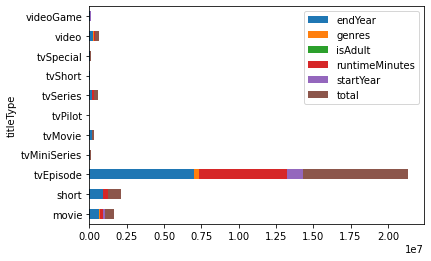

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.barplot(data=condition_pivot, x = 'titleType')
# plt.show()

ax = condition_pivot.plot(kind='barh', stacked=True)

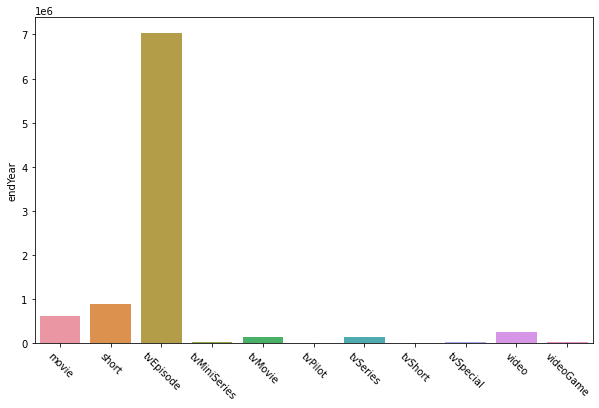

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = condition_pivot.index.values, y = condition_pivot['endYear'], data = condition_pivot)
ax.tick_params(axis='x', rotation=-45)

In [ ]:
title_basics['genres'].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Biography,Crime,Music', 'Mystery,Reality-TV,Thriller',
       'Musical,Reality-TV,Talk-Show'], dtype=object)

# M2) Tile crew

In [ ]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324314 entries, 0 to 9324313
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 213.4+ MB


# M3) Akas

In [ ]:
title_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
33626383,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
33626384,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
33626385,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
33626386,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [ ]:
condition1 = title_akas[['region', 'language']] != r'\N'
condition1_pivot = condition1.pivot_table(values = title_akas[['region', 'language']], index = title_akas['titleId'], aggfunc = 'count')
condition1_pivot['total'] = title_akas['titleId'].value_counts()
condition1_pivot

,language,region,total
titleId,,,
tt0000001,8,8,8
tt0000002,8,8,8
tt0000003,9,9,9
tt0000004,8,8,8
tt0000005,12,12,12
...,...,...,...
tt9916846,7,7,7
tt9916848,7,7,7
tt9916850,7,7,7


# M4) title_ratings

In [ ]:
title_ratings
#We have 1238672 titles rated
#There are no Null values
#How many movies/movies and shorts have been rated?

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1241069,tt9916690,7.4,6
1241070,tt9916720,5.3,270
1241071,tt9916730,9.0,6
1241072,tt9916766,6.7,21


In [ ]:
#There are no Null values
condition1 = title_ratings[['tconst', 'averageRating', 'numVotes']] == r'\N'
condition1.sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

# Title_Basics_ratings = Merge between tittle basics and Title ratings

In [ ]:
Title_basics_ratings = pd.merge(title_basics, title_ratings, how='outer', on=['tconst', 'tconst'])
Title_basics_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1920.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,260.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1728.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,173.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2541.0
...,...,...,...,...,...,...,...,...,...,...,...
9324309,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9324310,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9324311,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9324312,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short,NaN,NaN


In [ ]:
condition_br = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] <= '2022')]
condition_br.head(10)
# condition_br.sort_values(['numVotes', 'averageRating'], ascending = False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1920.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,260.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1728.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,173.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2541.0
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.1,175.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.4,797.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2063.0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.2,200.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.9,6951.0


In [ ]:
condition_br['titleType'].value_counts()

short    868113
movie    538414
Name: titleType, dtype: int64

In [ ]:
condition_br_test = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] > '2022')]
condition_br_test['titleType'].value_counts()

movie    86922
short    28501
Name: titleType, dtype: int64

In [ ]:
condition_br['numVotes'].sum()

1014497616.0

In [ ]:
condition_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406527 entries, 0 to 9324312
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1406527 non-null  object 
 1   titleType       1406527 non-null  object 
 2   primaryTitle    1406527 non-null  object 
 3   originalTitle   1406527 non-null  object 
 4   isAdult         1406527 non-null  object 
 5   startYear       1406527 non-null  object 
 6   endYear         1406527 non-null  object 
 7   runtimeMinutes  1406527 non-null  object 
 8   genres          1406527 non-null  object 
 9   averageRating   423731 non-null   float64
 10  numVotes        423731 non-null   float64
dtypes: float64(2), object(9)
memory usage: 128.8+ MB


## Analysing what value to consider for top's

The ratings were analysed and were disregarded because a film that has only 2 votes but scores 10, would be on top.

In [ ]:
title_ratings.corr()

,averageRating,numVotes
averageRating,1.000000,0.010738
numVotes,0.010738,1.000000


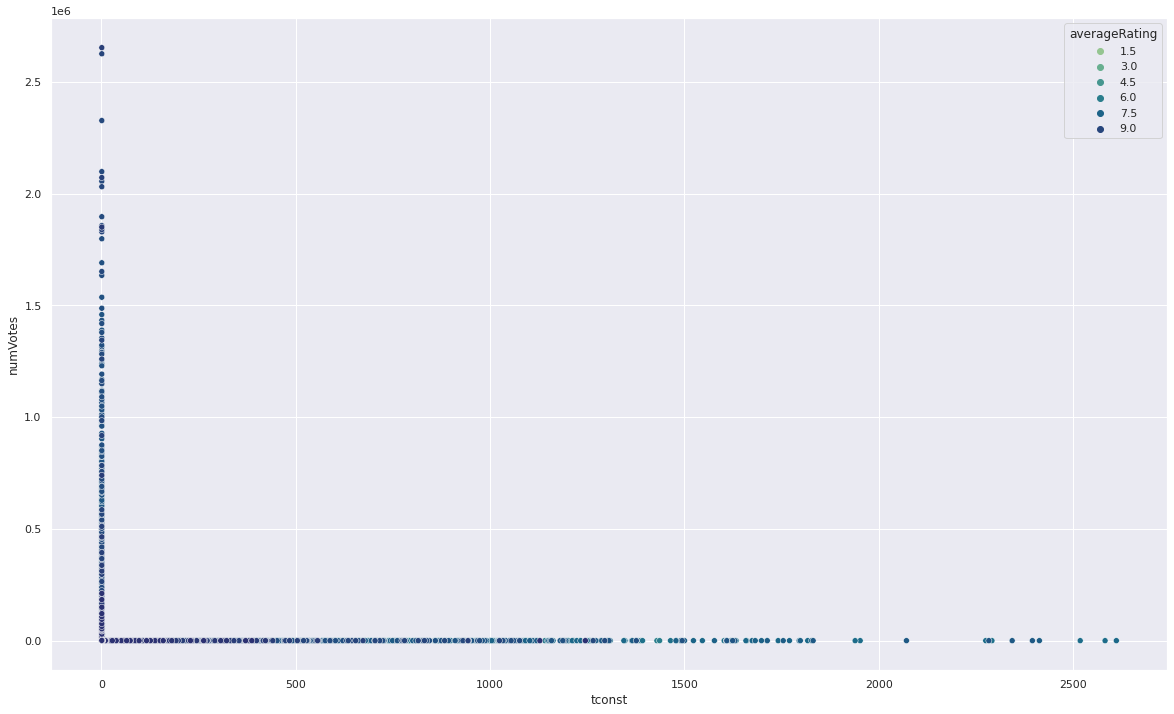

In [ ]:
title_ratings_count = title_ratings.groupby(['averageRating','numVotes']).count().reset_index()
title_ratings_count

sns.set(rc={'figure.figsize':(20,12)})
sns.scatterplot(data = title_ratings_count, x= 'tconst', y = 'numVotes',  hue = 'averageRating', palette='crest')

Could we find a value above wish we can consider?

In [ ]:
condition_br['numVotes'].quantile(.5)

#Answer: The value isnt meaningfull. There is great dispersion.

32.0

In [ ]:
condition_br.describe()

,averageRating,numVotes
count,423731.000000,4.237310e+05
mean,6.402804,2.394202e+03
std,1.427587,2.824689e+04
min,1.000000,5.000000e+00
25%,5.500000,1.300000e+01
50%,6.500000,3.200000e+01
75%,7.300000,1.550000e+02
max,10.000000,2.653689e+06


In [ ]:
sns.histplot(data = condition_br['wheighted_avg'])

KeyError: ignored

In [ ]:
condition_br.info()

Conclusion: To choose a minimum number ofvotes to consider based on the median or other quantiles is not very logical.

Discussion on Weighted average: Could be a good indicator because it has in count both the ratings as the number of votes, but the values aren't meaningfull, that is, they don't show in a scale from 1to 10, that people relate to. When we try to scale it (using a 3 simple rule for the ['weighted'].max() as the 10), the shawshank redemption (top movie) is so far from the rest that the values still arent meaningfull. 

In [ ]:
#weighted average for scoring
condition_br['wheighted_avg'] = (condition_br['averageRating']*condition_br['numVotes'])/condition_br['numVotes'].sum()
condition_ = condition_br.sort_values(['wheighted_avg'], ascending = False).head(10)

In [ ]:
#does it represent the number of votes?
sns.scatterplot(data = condition_br, x = 'numVotes', y = 'wheighted_avg')

In [ ]:
#does it represent the average ratings?
sns.scatterplot(data = condition_br, x = 'averageRating', y = 'wheighted_avg')

In [ ]:
#3 simple rule for the weighted to be meaningfull
condition_br['wheighted_rule'] = (condition_br['wheighted']*10)/(condition_br['wheighted'].max())
condition_br['wheighted_rule'].value_counts()
# condition_test = condition_br.loc[condition_br['wheighted_rule'] == 10]
# condition_test

In [ ]:
#scoring bins
#using np
def score(x):
  if x in np.percentile(condition_br['wheighted'],10):
    return 1
  elif x in np.percentile(condition_br['wheighted'],20):
    return 2
  elif x in np.percentile(condition_br['wheighted'],30):
    return 3
  elif x in np.percentile(condition_br['wheighted'],40):
    return 4
  elif x in np.percentile(condition_br['wheighted'],50):
    return 5
  elif x in np.percentile(condition_br['wheighted'],60):
    return 6
  elif x in np.percentile(condition_br['wheighted'],70):
    return 7
  elif x in np.percentile(condition_br['wheighted'],80):
    return 8
  elif x in np.percentile(condition_br['wheighted'],90):
    return 9
  else:
    return 10

condition_br['wheighted'] = condition_br['wheighted'].apply(score)
condition_br

In [ ]:
#using pandas
def score(x):
  if x in condition_br.quantile(.10):
    return 1
  elif x in condition_br.quantile(.20):
    return 2
  elif x in condition_br.quantile(.30):
    return 3
  elif x in condition_br.quantile(.40):
    return 4
  elif x in condition_br.quantile(.50):
    return 5
  elif x in condition_br.quantile(.60):
    return 6
  elif x in condition_br.quantile(.70):
    return 7
  elif x in condition_br.quantile(.80):
    return 8
  elif x in condition_br.quantile(.09):
    return 9
  else:
    return 10

condition_br['wheighted_score'] = condition_br['wheighted'].apply(score)
condition_br

In [ ]:
condition_br['wheighted_score_test'] = pd.qcut(condition_br['wheighted'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
condition_br['wheighted_score_test2'] = pd.qcut(condition_br['wheighted'], q = 11, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
condition_br['wheighted_score_test2'].fillna(0)

In [ ]:
type(condition_br['wheighted_score_test2'][0])

In [ ]:
condition_br['wheighted_score_test2'].value_counts()

In [ ]:
#trying to convert the discrete variable to continuous (didn't work)
#condition_br['wheighted_score_test2'].astype('int32').dtypes 
condition_br['wheighted_score_test2'].to_numpy()

Because we scored in bins and couldn't go back to make it a continuous variable scoring system, there was no difference between, we abandoned this hypothesis because all 9's or all 10's would be in the same group and we couldn't distinguish the top 3/5/10 movies from the others on the same category.

In [ ]:
#try to multiply the weif«ghted by a factor to give a meaningfull value
condition_br['wheighted_rule_test'] = condition_br['wheighted']*100000
condition_br['wheighted_rule_test'].describe()

#Answer: this also didnt work, because the max weighted value is too far from all the other values, and we would end up with an average weighted across the df very low.


Conclusion: We decided to go another way, we searched and found the weighted average formula of IMDB wich was the one we decided for. Nevertheless, our top movies are a little diferente because, as was explained in IMDB, they also give more 'power' to the voters that vote more times and we dont have access to that information.

In [ ]:
#Calculate the IMDB weighted average
C = condition_br['averageRating'].mean()

condition_br['wheighted_IMDB'] = ((condition_br['numVotes']/(condition_br['numVotes']+25000))*condition_br['averageRating']) + ((25000/(condition_br['numVotes']+25000))*C)
condition_br_movies = condition_br.sort_values(by='wheighted_IMDB', ascending = False).head(10)
condition_br_movies

In [ ]:
sns.boxplot(data = condition_br['wheighted_IMDB'])

In [ ]:
n

#Year analysis and Top's

We decided to use the IMDB weighted average for the Top's




## 1) Year analysis

In [ ]:
condition_ms = condition_br.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
#condition_ms
years_pivot = condition_ms.pivot_table(values = 'tconst', index = 'startYear', aggfunc = 'count')
years_pivot = years_pivot.rename(columns={'tconst' : 'n_entries'})
years_pivot

years_pivot.columns = ['n_titles']
years_pivot
# years_pivot_res = years_pivot.reset_index()
# years_pivot_res

#first movie/short = 1874 on IMDB (is a percussor, because public screening of ten of the Lumière brothers' short films in Paris on 28 December 1895 can be regarded as the breakthrough of projected cinematographic motion pictures.)

In [ ]:
check = years_pivot['n_titles'] == years_pivot['n_titles'].max()
years_pivot.loc[check]

In [ ]:
sns.set_style("white")

fig,ax = plt.subplots(figsize=(10,6))
fig.suptitle('Number of Movies & Shorts vs. time')

sns_years = sns.lineplot(data = years_pivot, x = years_pivot.index.values, y = 'n_titles')
plt.xticks(['1900', '1925', '1950', '1975', '2000', '2022'])

fig01 = sns_years.get_figure()
fig01.savefig("sns_years.png")

## 2) Top rated movies

In [ ]:
title_ratings

In [ ]:
condition_ms = condition_br.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
condition_ms

condition_ms.pivot_table(values = 'wheighted_IMDB', index = 'startYear', aggfunc = 'mean').sort_values(by = 'wheighted_IMDB', ascending = False).head()

In [ ]:
C = condition_br['averageRating'].mean()

condition_br['wheighted_IMDB'] = ((condition_br['numVotes']/(condition_br['numVotes']+25000))*condition_br['averageRating']) + ((25000/(condition_br['numVotes']+25000))*C)
condition_br_movies = condition_br.sort_values(by='wheighted_IMDB', ascending = False).head(10)
condition_br_movies

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Top ten Movies & Shorts')

# pal = sns.color_palette("Blues")
sns_titles = sns.barplot(data = condition_br_movies, x = 'wheighted_IMDB', y = 'primaryTitle', color = 'steelblue', orient = 'h')

fig03 = sns_titles.get_figure()
fig03.savefig("sns_titles.png", bbox_inches = "tight")

# TOP rated genres

In [ ]:
Title_basics_ratings = pd.merge(title_basics, title_ratings, how='outer', on=['tconst', 'tconst'])
condition_br = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] <= '2022')]
# condition_br['wheighted'] = (condition_br['averageRating']*condition_br['numVotes'])/(condition_br['numVotes'].sum())

In [ ]:
condition_br['wheighted'] = (condition_br['averageRating']*condition_br['numVotes'])/(condition_br['numVotes'].sum())
condition_br.describe()

In [ ]:
#With IMDB formula
C = condition_br['averageRating'].mean()

condition_br['wheighted_IMDB'] = ((condition_br['numVotes']/(condition_br['numVotes']+25000))*condition_br['averageRating']) + ((25000/(condition_br['numVotes']+25000))*C)
condition_br['wheighted_IMDB'].describe()

In [ ]:
condition_br["genres"] = condition_br.genres.str.split(',')

In [ ]:
conditon_br_split = condition_br.explode("genres")
conditon_br_split

In [ ]:
genres_group = conditon_br_split.groupby(['genres']).agg({'wheighted': 'mean', 'averageRating': 'mean', 'tconst' : 'count', 'wheighted_IMDB' : 'mean'}).reset_index()
genres_group_loc = genres_group.sort_values(['wheighted_IMDB'], ascending = False).head(10)
genres_group_loc.columns = ['genres', 'weighted_avg', 'averageRating', 'n_titles', 'wheighted_IMDB']
genres_group_loc.sort_values(by='wheighted_IMDB', ascending = False)

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Top ten Movies & Shorts Genres')

pal = sns.color_palette("Blues", len(genres_group_loc['n_titles']))
sns_genres = sns.barplot(data = genres_group_loc, x = 'genres', y = 'weighted_avg', hue = 'n_titles', palette = 'PuBu', dodge=False)

fig02 = sns_genres.get_figure()
fig02.savefig("sns_genres.png")


In [ ]:
#Another way to vary the color by the values:

# fig, ax = plt.subplots(figsize = (10,5))
# fig.suptitle('Top ten Movies & Shorts Genres')

# pal = sns.color_palette("Blues", len(genres_group_loc['n_titles']))
# sns.barplot(data = genres_group_loc, x = 'genres', y = 'weighted_avg', hue = 'n_titles', palette = np.array(pal[::1]), dodge=False)

# General data

In [ ]:
#Checking values in the Title_basics_ratings table
test = Title_basics_ratings.loc[Title_basics_ratings['originalTitle'] == 'The Shawshank Redemption']
test

In [ ]:
#Checking possibilities: Best 10 Documentaries using string contains
condition_br = condition_br[condition_br['genres'].str.contains('Documentary')]
condition_br.sort_values(['score'], ascending = False).head(10)

In [ ]:
# Trying to do a pieplot
size_of_groups=[868113,538414, ]
names = ['short', 'movie']

# Create a pieplot
plt.pie(size_of_groups)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size_of_groups, labels=names, colors=['steelblue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()